In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [2]:
raw_data = {'Valtio':['Suomi','Ruotsi','Norja','Tanska','Islanti'], 'BKT (Milj)':[251900,538000,398800,324900,23900],
           'Väestönlkm (Milj)':[5.5, 10, 5.3, 5.8, 0.3], 'Työllisyysaste':['75%', '74%','73%', '76%', '86%']}
df = pd.DataFrame(raw_data)
df

,Valtio,BKT (Milj),Väestönlkm (Milj),Työllisyysaste
0,Suomi,251900,5.5,75%
1,Ruotsi,538000,10.0,74%
2,Norja,398800,5.3,73%
3,Tanska,324900,5.8,76%
4,Islanti,23900,0.3,86%


In [3]:
df.index=df['Valtio']
df

,Valtio,BKT (Milj),Väestönlkm (Milj),Työllisyysaste
Valtio,,,,
Suomi,Suomi,251900,5.5,75%
Ruotsi,Ruotsi,538000,10.0,74%
Norja,Norja,398800,5.3,73%
Tanska,Tanska,324900,5.8,76%
Islanti,Islanti,23900,0.3,86%


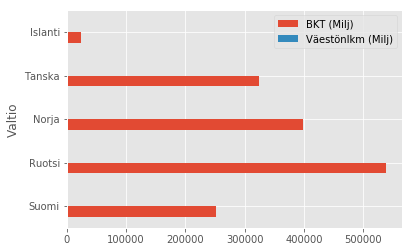

In [4]:
plt.style.use('ggplot')
df.plot.barh()

In [5]:
df.pivot_table(values='BKT (Milj)', index='Valtio').sort_values('BKT (Milj)', ascending=False)

C:\Users\kataj\Anaconda3\lib\site-packages\pandas\core\reshape\pivot.py:86: FutureWarning: 'Valtio' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  grouped = data.groupby(keys, observed=False)


,BKT (Milj)
Valtio,
Ruotsi,538000
Norja,398800
Tanska,324900
Suomi,251900
Islanti,23900


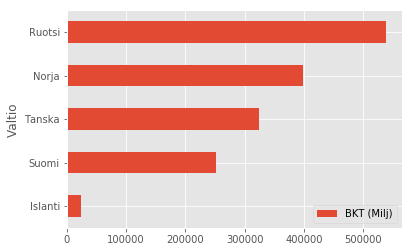

In [6]:
df.pivot_table(values= 'BKT (Milj)', index= 'Valtio').sort_values('BKT (Milj)').plot.barh()

[Text(0, 0, '0'),
 Text(0, 0, '100'),
 Text(0, 0, '200'),
 Text(0, 0, '300'),
 Text(0, 0, '400'),
 Text(0, 0, '500'),
 Text(0, 0, '600')]

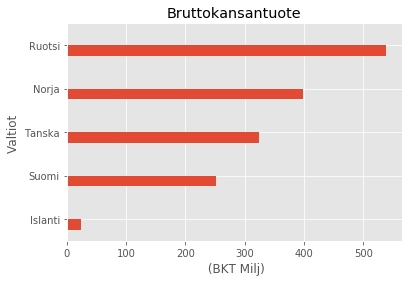

In [7]:
ax = df.sort_values(by='BKT (Milj)').plot.barh(title='Bruttokansantuote',legend=False)
ax.set(xlabel=' (BKT Milj)',ylabel='Valtiot')
vals=ax.get_xticks()
ax.set_xticklabels(['{:.0f}'.format(x/1000) for x in vals])

In [8]:
bktyht = df['BKT (Milj)'].sum()
df['Prosenttiosuus maiden kokonais BKT:sta']=df['BKT (Milj)']/bktyht*100
df

,Valtio,BKT (Milj),Väestönlkm (Milj),Työllisyysaste,Prosenttiosuus maiden kokonais BKT:sta
Valtio,,,,,
Suomi,Suomi,251900,5.5,75%,16.383740
Ruotsi,Ruotsi,538000,10.0,74%,34.991870
Norja,Norja,398800,5.3,73%,25.938211
Tanska,Tanska,324900,5.8,76%,21.131707
Islanti,Islanti,23900,0.3,86%,1.554472


In [9]:
väestöyht = df['Väestönlkm (Milj)'].sum()
df['Prosenttiosuus kokonais väestöstä']=df['Väestönlkm (Milj)']/väestöyht*100
df

,Valtio,BKT (Milj),Väestönlkm (Milj),Työllisyysaste,Prosenttiosuus maiden kokonais BKT:sta,Prosenttiosuus kokonais väestöstä
Valtio,,,,,,
Suomi,Suomi,251900,5.5,75%,16.383740,20.446097
Ruotsi,Ruotsi,538000,10.0,74%,34.991870,37.174721
Norja,Norja,398800,5.3,73%,25.938211,19.702602
Tanska,Tanska,324900,5.8,76%,21.131707,21.561338
Islanti,Islanti,23900,0.3,86%,1.554472,1.115242


In [10]:
bkt1 = df['Prosenttiosuus maiden kokonais BKT:sta']
bkt2 = df['Prosenttiosuus kokonais väestöstä']
df['Tuotteliaisuuskerroin']=bkt1/bkt2
df

,Valtio,BKT (Milj),Väestönlkm (Milj),Työllisyysaste,Prosenttiosuus maiden kokonais BKT:sta,Prosenttiosuus kokonais väestöstä,Tuotteliaisuuskerroin
Valtio,,,,,,,
Suomi,Suomi,251900,5.5,75%,16.383740,20.446097,0.801314
Ruotsi,Ruotsi,538000,10.0,74%,34.991870,37.174721,0.941281
Norja,Norja,398800,5.3,73%,25.938211,19.702602,1.316487
Tanska,Tanska,324900,5.8,76%,21.131707,21.561338,0.980074
Islanti,Islanti,23900,0.3,86%,1.554472,1.115242,1.393843


In [11]:
bkt3 = df['BKT (Milj)']
bkt4 = df['Väestönlkm (Milj)']
df['BKT per henkilö']=bkt3/bkt4
df

,Valtio,BKT (Milj),Väestönlkm (Milj),Työllisyysaste,Prosenttiosuus maiden kokonais BKT:sta,Prosenttiosuus kokonais väestöstä,Tuotteliaisuuskerroin,BKT per henkilö
Valtio,,,,,,,,
Suomi,Suomi,251900,5.5,75%,16.383740,20.446097,0.801314,45800.000000
Ruotsi,Ruotsi,538000,10.0,74%,34.991870,37.174721,0.941281,53800.000000
Norja,Norja,398800,5.3,73%,25.938211,19.702602,1.316487,75245.283019
Tanska,Tanska,324900,5.8,76%,21.131707,21.561338,0.980074,56017.241379
Islanti,Islanti,23900,0.3,86%,1.554472,1.115242,1.393843,79666.666667


In [12]:
df[['Prosenttiosuus maiden kokonais BKT:sta','Prosenttiosuus kokonais väestöstä','Tuotteliaisuuskerroin',
    'BKT per henkilö']].style.format('{:.1f}')

,Prosenttiosuus maiden kokonais BKT:sta,Prosenttiosuus kokonais väestöstä,Tuotteliaisuuskerroin,BKT per henkilö
Valtio,,,,
Suomi,16.4,20.4,0.8,45800.0
Ruotsi,35.0,37.2,0.9,53800.0
Norja,25.9,19.7,1.3,75245.3
Tanska,21.1,21.6,1.0,56017.2
Islanti,1.6,1.1,1.4,79666.7
